In [1]:
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

import numpy as np
import json

In [3]:
data_info = {
    "task_type": "binclass",
    "name": "poly_line",
    "id": "poly--id",
    "train_size": 3_000,
    "val_size": 1_500,
    "test_size": 1_500,
    "n_num_features": 2,
    "n_cat_features": 0
}

parent_dir = './data/poly_lines'
os.makedirs(parent_dir, exist_ok=True)
with open(f'{parent_dir}/info.json', 'w') as f:
    json.dump(data_info, f)

In [4]:
#function use to gereate random polynomials alwas going through (0,0)
def random_poly(dim=5):
    values = np.random.uniform(-10,10,dim)
    def poly(x):
        return sum(x*[values[i]*x**i for i in range(dim)])
    return poly

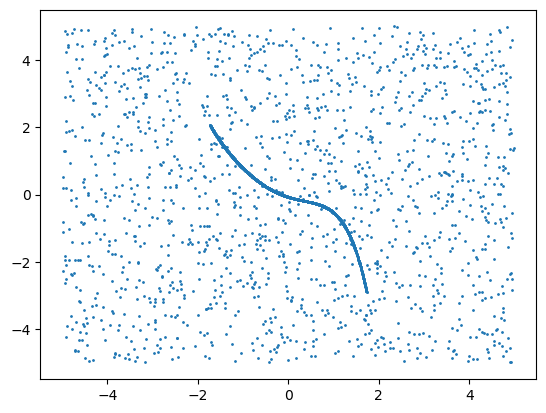

In [25]:
# Create random polynomial
poly = random_poly()
x = np.linspace(-1,1,3_000)
y = poly(x)
# scale data
scaler = StandardScaler()
#  make this two columns 
x = np.vstack([x,y]).T
# scale data
x = scaler.fit_transform(x)
# convert into image format 
x = scaler.fit_transform(x)
# Add noise bg
x_bg = np.random.uniform(-5, 5, (3_000,2))
x = np.concatenate([x, x_bg], axis=0) 

# get labels
y = np.zeros(x.shape[0], dtype=np.int32)
y[:3_000] = 1

# Randomly perturb data and label indices
idx = np.arange(x.shape[0])
np.random.shuffle(idx)
x = x[idx]
y = y[idx]

# Split into train, test, val
train_data = x[:3000]
test_data = x[3000:4500]
val_data = x[4500:]
# label
train_labels = y[:3000]
test_labels = y[3000:4500]
val_labels = y[4500:]

# plot data
plt.scatter(train_data[:, 0], train_data[:, 1], s=1)

In [26]:
x.shape

(6000, 2)

In [27]:
# Add noise to each point
train_data += np.random.randn(*train_data.shape)*0.1
test_data += np.random.randn(*test_data.shape)*0.1
val_data += np.random.randn(*val_data.shape)*0.1

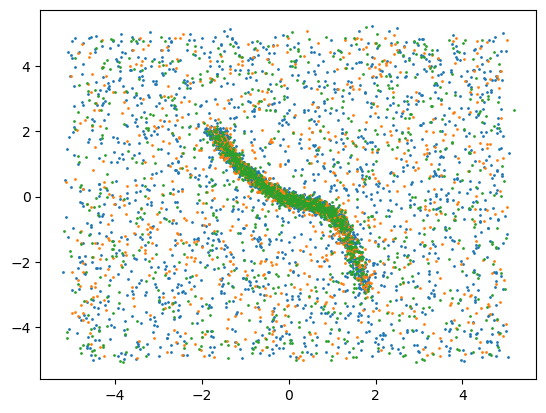

In [28]:
# Plot data
plt.scatter(train_data[:, 0], train_data[:, 1], s=1)
plt.scatter(test_data[:, 0], test_data[:, 1], s=1)
plt.scatter(val_data[:, 0], val_data[:, 1], s=1)

In [29]:
np.save(f'{parent_dir}/X_num_train.npy', train_data)
np.save(f'{parent_dir}/X_num_test.npy', test_data)
np.save(f'{parent_dir}/X_num_val.npy', val_data)
np.save(f'{parent_dir}/y_train.npy', train_labels)
np.save(f'{parent_dir}/y_test.npy', test_labels)
np.save(f'{parent_dir}/y_val.npy', val_labels)